Homework 2 — (15 points)
======
### What to hand in
You are to submit the following things for this homework:
1. A Jupyter notebook containing all code and output (figures and audio). I should be able to evaluate the file to reproduce all output. 
1. Any other data that we tell you to save to a file (e.g. audio files).

### How to hand it in
To submit your lab:
1. Compress all of the files specified into a .zip file. 
1. Name the file in the following manner, firstname_lastname_hw1.zip. For example, Bryan_Pardo_hw1.zip. 
1. Submit this .zip file via Canvas

In [1]:
str ='Q: Whats the difference between a large pizza and a singer songwriter? A large pizza can feed a family of four!'
print(str[::-1])

!ruof fo ylimaf a deef nac azzip egral A ?retirwgnos regnis a dna azzip egral a neewteb ecnereffid eht stahW :Q


## Run this code block 1st, to import some needed packages

In [2]:
# This line is a convenience to import most packages you'll need. You may need to import others (eg random and cmath)
import IPython, numpy as np, scipy as sp, matplotlib.pyplot as plt, matplotlib, sklearn, librosa, cmath,math
from IPython.display import Audio
 
# This line makes sure your plots happen IN the webpage you're building, instead of in separate windows.
%matplotlib inline

# Feel free to add some other imports here, if that is helpful



/Users/shannonnachreiner/miniconda2/envs/eecs352/lib/python2.7/site-packages/librosa/core/audio.py:37: UserWarning: Could not import scikits.samplerate. Falling back to scipy.signal
  warnings.warn('Could not import scikits.samplerate. '


## Implementing a spectrogram 

#### 1. (2 points) Make a short term Fourier transform (STFT) function.  

In [3]:
from scipy.fftpack import fft
from scipy.signal import hann

def make_sinewave(f, t, sr):
    """    
    Parameters
    ----------
    f:  float
        Frequency of sine wave
    t:  float
        Duration in seconds
    sr: int
        Sample rate
    
    Returns
    -------
    np.ndarray 
        Array of floats containing the signal
    """
    
    times = np.arange(0,t*sr)/sr
    x = np.sin(2*np.pi*f*times)
    
    return x

def plot_audio(x, sr, figsize=(16,4)):
    """
    A simple audio plotting function
    
    Parameters
    ----------
    x: np.ndarray
        Audio signal to plot
    sr: int
        Sample rate
    figsize: tuple
        A duple representing the figure size (xdim,ydim)
    """
    
    length = float(x.shape[0]) / sr
    t = np.linspace(0,length,x.shape[0])
    plt.figure(figsize=figsize)
    plt.plot(t, x)
    plt.ylabel('Amplitude')
    plt.xlabel('Time (s)')
    plt.show()

    #I did the transposed one that was like librosa's stft so I could check my results easier...
def stft(signal, window_size, hop_size, window_type = 'hann'):
    """
    Computes the short term fourier transform of a 1-D numpy array, where the array 
    is windowed into a set of subarrays, each of length window_size. The distance between
    window centers (in samples) is given by hop_size. The type of window applied is
    determined by window_type. This returns a 2-D numpy array where the ith row
    is the FFT of the jth window. Each column contains an array of complex values.
    
    Input Parameters
    ----------------
    signal: The 1-d (complex or real) numpy array containing the signal
    window_size: an integer scalar specifying the number of samples in a window
    hop_size: an integer specifying the number of samples between the start of adjacent windows
    window_type: a string specifying one of two "hann" or "rectangular"
    
    Returns
    -------
    a 2D numpy array of complex numbers where the array column is the FFT of the ith window,
    and the jth element in the ith column is the jth frequency of analysis.
    """
    #---------------------
    # your code goes below
    #---------------------
    
    left = 0 #where a window starts
    right = window_size #where a window ends
    i = 0
    j = 0
    counter = 0 #keeps track of how many windows we actually end up making
    
    result = []
    temp = []
    
    while (right <= signal.size):
        temp = signal[left:right]
        if (window_type == 'hann'):
            temp = np.multiply(sp.signal.hann(window_size), temp)
        temp = fft(temp)
        temp = temp[:window_size/2 + 1]
        result.append(temp)
        left += hop_size
        right += hop_size
        i += 1
        counter += 1
    
    #if rest of samples don't make a full window, zero pad a window
    if (left < signal.size):
        temp = np.zeros(window_size)
        temp[0:(signal.size-left)] = signal[left:signal.size]
        if (window_type == 'hann'):
            temp = np.multiply(sp.signal.hann(window_size), temp)
        temp = fft(temp)
        temp = temp[:window_size/2 + 1]
        result.append(temp)
        counter += 1
    
    return np.transpose(np.array(result[:counter], dtype=complex)) #we want row to represent freq of analysis and col to represent a window
    
x = make_sinewave(220., 0.0005, 44100)
mine = stft(make_sinewave(220.,0.0005, 44100), 6, 2, 'hann')
print "My STFT returns:"
print mine
print "Librosa's STFT returns:"
theirs = librosa.core.stft(make_sinewave(220.,0.0005, 44100), n_fft=6, hop_length=2, center=False, window=sp.signal.hanning)
print theirs
    
    

My STFT returns:
[[ 0.19562670+0.j          0.35132105+0.j          0.50563517+0.j
   0.65796281+0.j          0.80770553+0.j          0.95427505+0.j
   1.09709553+0.j          1.23560589+0.j          1.36926195+0.j
   1.49753864+0.j        ]
 [-0.12945046-0.02103541j -0.21380945-0.07010977j -0.29732846-0.11890869j
  -0.37967935-0.16724045j -0.46053862-0.21491518j -0.53958858-0.26174559j
  -0.61651867-0.30754768j -0.69102666-0.35214151j -0.76281984-0.3953519j
  -0.83161615-0.43700908j]
 [ 0.02958063+0.00228154j  0.03610660+0.01392184j  0.04249073+0.02550745j
   0.04870792+0.03699284j  0.05473375+0.04833291j  0.06054456+0.05948309j
   0.06611750+0.07039957j  0.07143069+0.08103949j  0.07646326+0.09136102j
   0.08119542+0.10132363j]
 [ 0.00411297+0.j          0.00408465+0.j          0.00404029+0.j
   0.00398006+0.j          0.00390419+0.j          0.00381299+0.j
   0.00370680+0.j          0.00358605+0.j          0.00345121+0.j
   0.00330281+0.j        ]]
Librosa's STFT returns:
[[ 0.195626

#### 2. (2 points) 
1. **Make a signal $S$ of length 300 that has 1 for every one of its 300 samples.** 
1. **Make a signal $W_1$ by windowing signal $S$ with a Hann window of length 200, starting at index 0.**  
1. **Make signal $W_2$ by windowing signal $S$ with a Hann window of length 200, starting at index 100.** 
1. **Now....make a reconstruction of $S$ from $W_1$ and $W_2$ by overlapping the two windowed signals 50% (the same way you took them from $S$ and adding them together....where $W_1[100]$ would aling with $W_2[0]$. This is called "overlap and add." **

**How much does the reconstructed signal look like the original? What happens if these windows are not overlapped 50%, but by some other amount?**   

It looks like the original in the parts of the windowing signals that were overlapping. Those 100 samples added back up to look exactly like the original signal. The first and last hundred samples, however, had nothing to add with, so they look like the windowed signal, not the original signal. 

If the windows are not overlapped 50%. When I use less overlap, I don't get as good of a reconstruction of the original signal, as evidenced by the third plot. Instead of there being a smooth line at amplitude 1 where the windowed signals overlap, it's two distinct humps where the section between them is not at amplitude 1. 

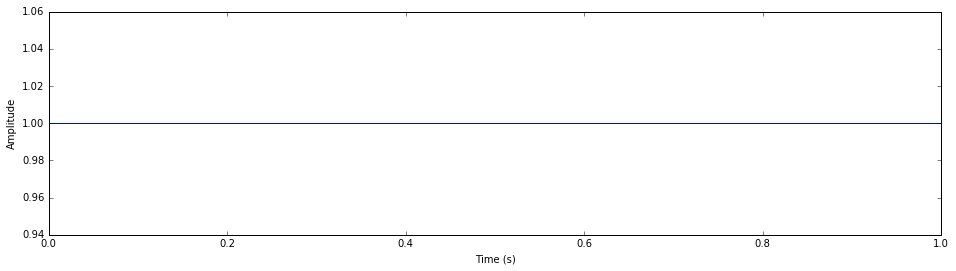

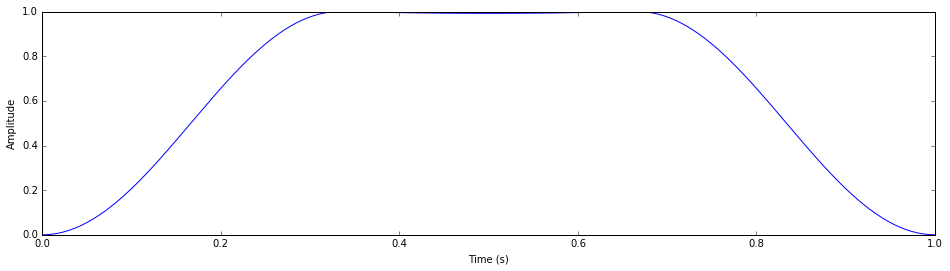

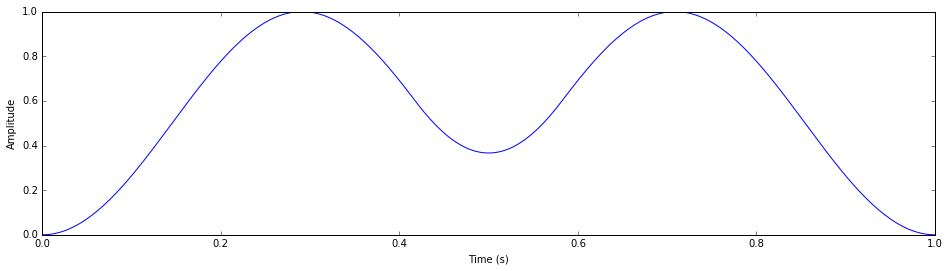

In [4]:
#---------------------
# your code goes below
#---------------------

s = 1 + make_sinewave(0, 1, 300)
plot_audio(s, sr=300)

#do 50% overlap
w1 = np.multiply(sp.signal.hann(200), s[:200])
w2 = np.multiply(sp.signal.hann(200), s[100:])
s_recon1 = np.empty(300)
s_recon1[:100] = w1[:100]
s_recon1[200:] = w2[100:]

j = 0
for i in range(100,200):
    s_recon1[i] = w1[i] + w2[j]
    j += 1

#try a different overlap
s_recon2 = np.empty(300)
w1 = np.multiply(sp.signal.hann(175), s[:175])
w2 = np.multiply(sp.signal.hann(175), s[125:])
s_recon2[:125] = w1[:125]
s_recon2[175:] = w2[50:]

i = 0
j = 0
for i in range(125,175):
    s_recon2[i] = w1[i] + w2[j]
    j += 1

#Plot them both to compare
plot_audio(s_recon1, sr=300)
plot_audio(s_recon2, sr=300)

#### 3. (2 points) Make an inverse STFT function to rebuild the original audio signal, using overlap & add resynthesis. You don't need to use a window function here.

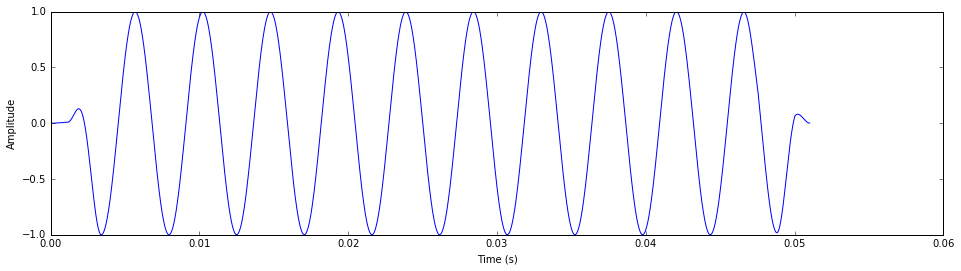

In [5]:
from scipy.fftpack import ifft

def istft(X, hop_size):
    """
    Takes a 2-D numpy array representing an STFT of some signal, where stft[i] 
    is the FFT of the ith window as input and stft[i,k] is the kth frequency of analysis.
    Performs an inverse FFT on each window and then does overlap & add resynthesis to rebuild 
    the original signal the STFT was built from.
    
    Input Parameters
    ----------------
    X: a 2-D numpy array of complex numbers representing an STFT, where the ith 
    column is the FFT of the ith window, and the jth row is the jth frequency of analysis.
        
    hop_size: an integer specifying the number of samples between the start of adjacent windows.
        
    Returns
    -------
    a 1-d numpy array of (possibly complex) values representing the original signal used to make X
    """
    #---------------------
    # your code goes below
    #---------------------
    
    fft_samples = 2 * (X.shape[0] - 1) #how many samples were there before nyquisted out
    window_size = X.shape[1]
    expected_signal_len = fft_samples + hop_size * (window_size - 1)
    reconstructed = np.zeros(expected_signal_len)

    for i in range(window_size):
        fft = X[:, i] #the fft of a window
        fft = np.concatenate((fft, fft[-2:0:-1])) #add the above nyquist freqs back in
        reconstructed[i * hop_size:(i * hop_size + fft_samples)] += np.real(ifft(fft))

    return reconstructed
    
you = stft(make_sinewave(220.,0.05, 44100), 200, 50, 'hann')
meow = istft(you, 50)
plot_audio(meow, 44100)

    

#### 4. (2 points) Display a magnitude spectrogram of an audio signal. Amplitude must be in dB. Correct frequencies must be displayed. Display only frequencies up to the Nyquist rate.  Time must be displayed in seconds. NOTE: you cannot use any functions in librosa to do this.

/Users/shannonnachreiner/miniconda2/envs/eecs352/lib/python2.7/site-packages/ipykernel/__main__.py:45: DeprecationWarning: using a non-integer number instead of an integer will result in an error in the future


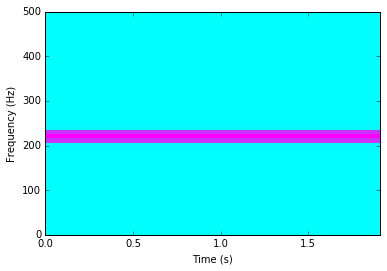

In [6]:
def spectrogram(signal, window_size, hop_size, sample_rate, window_type = 'hann', display = 1 ):
    """
    Computes the short term fourier transform of a 1-D numpy array, where the array 
    is windowed into a set of subarrays, each of length window_size. The distance between
    window centers (in samples) is given by hop_size. The type of window applied is
    determined by window_type. This creates a 2-D numpy array where the ith column
    is the FFT of the ith window. Each column contains an array of complex values.
    It then creates a magnitude spectrogram of the signal and plots it on the screen.
    Here, the vertical dimension is frequency (in Hz), the horizontal dimension is time
    (in seconds), brightness corresponds to amplitude (in dB). Only frequencies up to
    the Nyquist rate are displayed.
    
    Input Parameters
    ----------------
    signal: The 1-d (complex or real) numpy array containing the signal
    window_size: an integer scalar specifying the number of samples in a window
    hop_size: an integer specifying the number of samples between the start of adjacent windows
    sample_rate: an integer giving the sample rate of the input signal, in Hz
    window_type: a string specifying one of two "hann" or "rectangular"
    display: an integer. If set to 1, it plots the spectrogram. Else it does not.
    
    Returns
    -------
    an output tuple with 3 items
    
    sgram:  a 2-D numpy array of real-valued numbers that contains the magnitude spectrogram
           sgram[t,f] is the magnitude at time t and frequency f. This only contains values
           up to the nyquist frequency
    times: a 1-D numpy array of non-negative real-values that gives the times,  
           times[t] gives the start time of the tth window in seconds
    freqs: a 1-D numpy array  of non-negative real values. freqs[f] gives the fth
           frequency of analysis in Hz, up to the nyquist frequency
           
    Calling Example
    ---------------
    sgram,times,freqs = spectrogram(signal, window_size, hop_size, sample_rate )

    """ 
    #---------------------
    # your code goes below
    #---------------------
        
    f_analysis = sample_rate*1.0/window_size
    nyquist = sample_rate/2
    freqs = np.empty(nyquist/f_analysis + 1)
    
    freq = 0
    for j in range(freqs.size):
        freqs[j] = freq
        freq += f_analysis
    
    sgram = stft(signal, window_size, hop_size, 'hann')
    sgram_copy = []
    for k in range(sgram.shape[0]):
        temp = sgram[:,k]
        temp = np.abs(temp)
        sgram_copy.append(20*np.log10(temp + 1)) #convert to decibels
        
    times = np.zeros(sgram.shape[1])
    seconds_per_sample = 1.0 / sample_rate
    times[0] = 0
    for t in range(1, times.size):
        times[t] = times[t-1] + (hop_size * seconds_per_sample)
    
    
    #plt.pcolormesh(np.array(sgram_copy))
    fig = plt.figure()
    ax = fig.add_subplot(111)
    ax.imshow(np.rot90(np.array(sgram_copy)), interpolation="nearest", extent=[0,times[times.size-1],0,nyquist], cmap=plt.cm.cool, aspect='auto')
    plt.xlabel('Time (s)')
    plt.ylabel('Frequency (Hz)')
    
    return sgram, times, freqs
    
        
    
something, t, f = spectrogram(make_sinewave(220., 2., 1000), 100, 10, 1000)

## Manipulating audio

#### 5. (1 point) Increase the speed of playback for the file piano.wav by 25%...but don't change the pitch. (don't use librosa)

In [7]:
#---------------------
# your code goes below
#---------------------

piano, sr = librosa.load('piano.wav', sr=44100, duration=10)

IPython.display.display(Audio(piano, rate=44100))

hi = stft(piano, 5000, 750, 'hann')
new_hop_size = 750 / 1.25 # to increase hop_size and make it play back faster by 25%
hello = istft(hi, new_hop_size)
IPython.display.display(Audio(hello, rate=44100))


/Users/shannonnachreiner/miniconda2/envs/eecs352/lib/python2.7/site-packages/ipykernel/__main__.py:28: DeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
/Users/shannonnachreiner/miniconda2/envs/eecs352/lib/python2.7/site-packages/ipykernel/__main__.py:33: DeprecationWarning: using a non-integer number instead of an integer will result in an error in the future


#### 6. (1 point) Now increase the pitch of file piano.wav by  two musical whole steps without changing the duration of the audio. (again.... don't use librosa)

In [8]:
#---------------------
# your code goes below
#---------------------

meow = librosa.effects.pitch_shift(piano, 44100, 4)

hi = stft(piano, 2048, 512, 'hann')
new_hop_size = 512 * (2**(4.0/12)) #increase hop size to stretch the time
hello = istft(hi, 648)


new_sr = 44100 * (2**(4.0/12)) #increase the pitch
Audio(hello, rate=new_sr)



## Log Frequency 

#### 7. ( 2 points) Write a function that emulates triangular filters in the frequency domain. This function will be used to map from the linearly spaced frequencies of the STFT to another specified set of frequencies, with arbitrary spacing.



In [9]:
def make_triangular_filters(cfreqs, freqs ):
    """
    Computes a set of "filters" to apply to an STFT to change its frequency scaling.
    This takes an array of center frequencies (cfreqs) and a set of frequencies of 
    analysis (freqs) as input, both coded in Hz.  It will return a 2-D numpy array 
    filters[c][f], where c is the index number of a center frequency in cfreqs and 
    f is the index to a frequency in freqs and the value in filters[c][f] is a number 
    between 0 and 1 that represents how sensitive this filter is to that frequency.  
    Filters are triangular, with a linear decrease in sensitivity from the center 
    frequency (sensitivity = 1) down to a sensitivity of 0 by the center frequency 
    of each adjacent freqency.
    
    Input Parameters
    ----------------
    cfreqs: a 1-D python array of center frequencies measured in Hz
    freqs:   a 1-D python array of frequencies for whom we need to calculate the sensitivity
             of each filter
    
    Returns
    -------
    filters: a 2-D numpy array, where c is the index number of a center frequency in 
            cfreqs and f is the index to a frequency in freqs and the value in filters[c][f] 
            is a number between 0 and 1 that represents how sensitive this filter is to 
            that frequency.
    """
    #---------------------
    # your code goes below
    #---------------------
    
    result = np.zeros((cfreqs.size, freqs.size))
        
    for i,c in enumerate(cfreqs):
        for k,f in enumerate(freqs):
            if (i == 0):
                if (f > cfreqs[i+1]):
                    continue
                if (f >= c):
                    result[i][k] = 1 - (f-c) / (cfreqs[i+1] - c)
                else: 
                    result[i][k] = 0
            elif (i == cfreqs.size - 1):
                if (f < cfreqs[i-1]):
                    continue
                if (f <= c):
                    result[i][k] = 1 - (c - f) / (c - cfreqs[i-1])
                else: 
                    result[i][k] = 0
            elif (f < cfreqs[i-1] or f > cfreqs[i+1]): #when f passes another center frequency, it is not sensitive to c
                result[i][k] = 0
            elif (f < c): #calculate sensitivity of f below c
                result[i][k] = 1 - (c - f) / (c - cfreqs[i-1])
            elif (f > c): #calculate sensitivity of f above c
                result[i][k] = 1 - (f - c) / (cfreqs[i+1] - c)
            elif (f == c):
                result[i][k] = 1
                
    return result
        
make_triangular_filters(np.array([1,3,4]), np.array([1.5,2.5,3.5]))
        

array([[ 0.75,  0.25,  0.  ],
       [ 0.25,  0.75,  0.5 ],
       [ 0.  ,  0.  ,  0.5 ]])

#### 8. (1 point) You have been given a set of input frequencies spaced 1 Hz apart and ranging from the bottom piano note to the top note...and a second set of a center frequencies that are spaced with 1 per key on the piano. Use your code from problem 7 to create a filterbank, mapping the energy from the first set of frequencies to the second set of frequencies. Then display the filterbank as a 2-D image where the vertical dimension is freq in Hz, the horizontal dimension is the index of a filter (i.e. the piano key number) and the color gives the strength of the filter response. Label your dimensions. Also, give a list of the piano key frequencies below the plot. 

Sorry it's above the plot, but this is a list of the piano key frequencies
[   27.5           29.13523509    30.86770633    32.70319566    34.64782887
    36.70809599    38.89087297    41.20344461    43.65352893    46.24930284
    48.9994295     51.9130872     55.            58.27047019    61.73541266
    65.40639133    69.29565774    73.41619198    77.78174593    82.40688923
    87.30705786    92.49860568    97.998859     103.82617439   110.
   116.54094038   123.47082531   130.81278265   138.59131549   146.83238396
   155.56349186   164.81377846   174.61411572   184.99721136   195.99771799
   207.65234879   220.           233.08188076   246.94165063   261.6255653
   277.18263098   293.66476792   311.12698372   329.62755691   349.22823143
   369.99442271   391.99543598   415.30469758   440.           466.16376152
   493.88330126   523.2511306    554.36526195   587.32953583   622.25396744
   659.25511383   698.45646287   739.98884542   783.99087196   830.60939516
   880.           932.

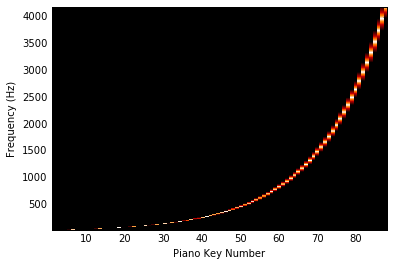

In [10]:
# A440 is 39 keys from the top of the piano and 44 keys from the bottom
top_piano_note =  440*2**(39.0/12)
bottom_piano_note = 440*2**(-48.0/12)

# our frequencies will be spaced 1 Hz appart in this domain
freqs = np.linspace(bottom_piano_note,top_piano_note,(top_piano_note-bottom_piano_note + 1))

# our center frequencies will be spaced with one per piano note
cfreqs = bottom_piano_note * np.logspace(0, 87.0/12, 88, base=2)

#---------------------
# your code goes below
#---------------------

x = make_triangular_filters(cfreqs,freqs)

fig = plt.figure()
ax = fig.add_subplot(111)
ax.imshow(np.rot90(x), interpolation="nearest",extent=[1,88,bottom_piano_note,top_piano_note],cmap=plt.cm.gist_heat,aspect='auto')
plt.xlabel('Piano Key Number')
plt.ylabel('Frequency (Hz)')

print "Sorry it's above the plot, but this is a list of the piano key frequencies"
print cfreqs


#### 9. (2 point)  Use the mapping from frequency $f$ to mel $m$ defined in (1) to make a mel-frequency filter bank with 40 filters, evenly spaced in mels, that covers the same range as the piano-note spaced filterbank.  Display a plot of it. Give a list of the mel frequencies (in Hz). Do you think this number of filters and spacing appropriately captures the salient aspects of music? Why or why not?

$m = 2595log_{10}(1+\frac{f}{700})$

(1) Douglas O'Shaughnessy (1987). Speech communication: human and machine. Addison-Wesley. p. 150. ISBN 978-0-201-16520-3.

See functions below for my math converting from mels to Hz and Hz to mels. The lowest piano note is 43.427 mels, and the highest piano note is 2189.807 mels. Scratch for writing a function: to go from mels back to frequency after we figure out evenly spaced mels: 10^(mel/2595) = 1 + f/700, f = 700 * (10^(mel/2595) - 1)

This number of filters and spacing does not appropriately capture the salient aspects of music because the spacing between them is bigger than a half note. There wouldn't be high sensitivity at the frequencies of the notes on a piano, the ones that we hear all the time in Western music. In other words, the notes that are distinguishable to the human ear would be far less distinguishable to the filter. 





This is the list of mel frequencies in mels
[   43.42721509    98.46259183   153.49796857   208.53334531   263.56872205
   318.60409879   373.63947553   428.67485227   483.71022901   538.74560575
   593.78098249   648.81635923   703.85173597   758.88711271   813.92248945
   868.95786619   923.99324293   979.02861967  1034.06399641  1089.09937315
  1144.13474989  1199.17012663  1254.20550337  1309.24088011  1364.27625686
  1419.3116336   1474.34701034  1529.38238708  1584.41776382  1639.45314056
  1694.4885173   1749.52389404  1804.55927078  1859.59464752  1914.63002426
  1969.665401    2024.70077774  2079.73615448  2134.77153122  2189.80690796]
This is the list of mel frequencies in Hz
[   27.5           63.90831158   102.13870584   142.28237035   184.43505623
   228.69730654   275.17469609   323.97808327   375.22387448   429.03430175
   485.53771432   544.86888475   607.16933043   672.58765107   741.27988319
   813.40987228   889.14966359   968.67991251  1052.19031551  1139.88006252
 

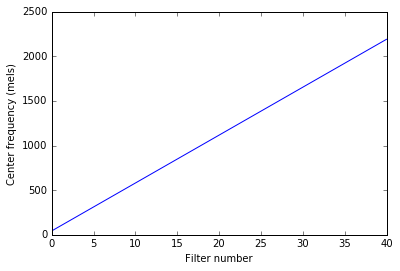

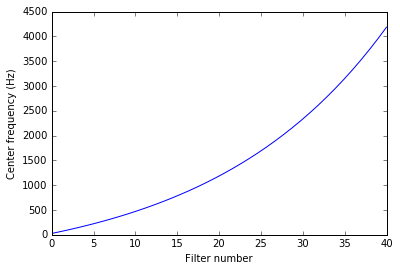

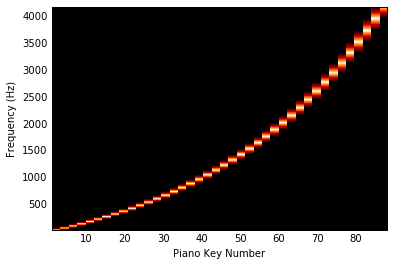

In [11]:
#---------------------
# your code goes below
#---------------------

def f_to_mel(f):
    return 2595 * np.log10(1 + f*1.0/700)

def mel_to_f(mel):
    return 700 * (10**(mel/2595.0) - 1)

lowest_note = f_to_mel(440*2**(-48.0/12))
highest_note = f_to_mel(440*2**(39.0/12))

cfreqs = np.linspace(lowest_note,highest_note,40) #this is the filterbank!
x = np.linspace(0,cfreqs.size, cfreqs.size)

fig = plt.figure()
fig.add_subplot(111)
plt.plot(x, cfreqs)
plt.xlabel('Filter number')
plt.ylabel('Center frequency (mels)')

print "This is the list of mel frequencies in mels"
print cfreqs

for i in range(cfreqs.size):
    cfreqs[i] = mel_to_f(cfreqs[i])

fig2 = plt.figure()
fig2.add_subplot(111)
plt.plot(x, cfreqs)
plt.xlabel('Filter number')
plt.ylabel('Center frequency (Hz)')

print "This is the list of mel frequencies in Hz"
print cfreqs

freqs = np.linspace(bottom_piano_note,top_piano_note,(top_piano_note-bottom_piano_note + 1))
x = make_triangular_filters(cfreqs,freqs)
fig = plt.figure()
ax = fig.add_subplot(111)
ax.imshow(np.rot90(x), interpolation="nearest",extent=[1,88,bottom_piano_note,top_piano_note],cmap=plt.cm.gist_heat,aspect='auto')
plt.xlabel('Piano Key Number')
plt.ylabel('Frequency (Hz)')
